In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words 매개변수는 훈련데이터에서 가장 자주 나오는 단어 1만개만 사용하겠다는것.

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

### 리뷰 데이터 하나를 원래 영어단어로 바꾸기

In [6]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인텍스를 매핑한 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집는다.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# 리뷰를 디코딩한다. 0, 1, 2 는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스라서 3을 뺀다.

### 데이터 준비

#### 정수 시퀀스를 이진 행렬로 인코딩하기

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # 크기가 (len(sequences), dimension)인 모든 원소가 0인 행렬을 만든다.
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results


x_train = vectorize_sequences(train_data) # 훈련데이터를 벡터로 변환한다.
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환한다.

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### 레이블은 0과 1의 리스트이기 때문에 쉽게 벡터로 바꿀 수 있다.

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 신경망 모델 만들기

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='binarp_crossentropy',
             metrics=['accuracy'])

#### 자신만의 옵티마이저 설정하기

In [14]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### 손실과 측정을 함수 객체로 지정하기

In [15]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

### 훈련 검증

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) # 정확도를 지정할 떼 accuracy 또는 acc 모두 사용 가능하다.

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 136ms/step - loss: 0.5142 - acc: 0.7829 - val_loss: 0.3977 - val_acc: 0.8447
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3049 - acc: 0.9023 - val_loss: 0.3065 - val_acc: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2232 - acc: 0.9259 - val_loss: 0.2788 - val_acc: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1770 - acc: 0.9427 - val_loss: 0.2832 - val_acc: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1405 - acc: 0.9549 - val_loss: 0.2838 - val_acc: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1199 - acc: 0.9629 - val_loss: 0.2934 - val_acc: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0993 - acc: 0.9714 - val_loss: 0.3177 - val_acc: 0.8848
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0815 - 

In [20]:
history_dict = history.history

In [21]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 훈련과 검증 손실 그리기

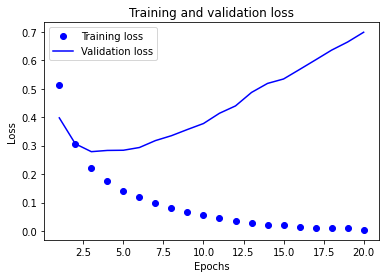

In [25]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미한다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미한다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련과 검증 정확도 그리기

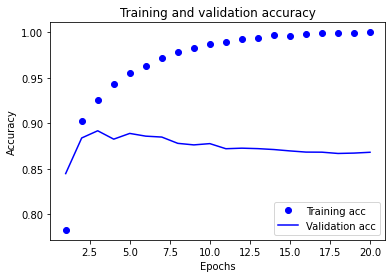

In [26]:
plt.clf() # 그래프를 초기화한다.
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 모델을 처음부터 다시 훈련하기

#### fit 메서드를 재호출하면 학습된 가중치에서 훈련이 이어지므로 처음부터 다시 학습하기위해 모델 객체를 새로 만든다.

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.4305 - accuracy: 0.8336
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2547 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1972 - accuracy: 0.9300
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3028 - accuracy: 0.8801


In [31]:
result

[0.30284905433654785, 0.8801199793815613]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [32]:
model.predict(x_test)

array([[0.16347009],
       [0.9998472 ],
       [0.65107   ],
       ...,
       [0.10589537],
       [0.05274406],
       [0.5428609 ]], dtype=float32)